In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib as mp
import matplotlib.pyplot as plt
import os


import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import SpectralClustering,MiniBatchKMeans,KMeans
from sklearn.decomposition import PCA
from sklearn.neighbors import KernelDensity
from sklearn.model_selection import GridSearchCV

#import hdbscan
#from hdbscan import HDBSCAN


from matplotlib.pyplot import figure
%matplotlib inline
sb.set_style('ticks')
sb.set_context("poster", font_scale=0.5,rc={"lines.linewidth": 1.5}) 

In [2]:
systems=['wt','mut']
REFS=['AVE','aF']

## rmsd analysis

In [3]:
rmsd=[]
REPS=['1','2','3']
#trajectories data
for sys in systems:
    #print(sys)
    for rep in REPS:
        for ref in REFS:
            if (sys=='wt'):
        #print(ref)
                temp=pd.read_csv('rmsd_all/rms_'+sys+'.'+'W'+rep+'.ref_'+ref+'.dat',delimiter=" ",
                         usecols=[0,1],skipinitialspace=True,names=('Frames','rmsd'),skiprows=1)
                temp['system']='Wild Type'
            else:
                temp=pd.read_csv('rmsd_all/rms_'+sys+'.'+'M'+rep+'.ref_'+ref+'.dat',delimiter=" ",
                         usecols=[0,1],skipinitialspace=True,names=('Frames','rmsd'),skiprows=1)
                temp['system']='Del523'
       
            temp['rep']=rep
            temp['ref']=ref
            if (ref=='aF'):
                temp['ref']='Alpha-Fold'
            else:
                temp['ref']='Average'
    
            
            rmsd.append(temp)

rmsdc=pd.concat((rmsd[i] for i,j in enumerate(rmsd)),ignore_index=True)
rmsdc.head()

,Frames,rmsd,system,rep,ref
0,1,2.9891,Wild Type,1,Average
1,2,3.0868,Wild Type,1,Average
2,3,3.1378,Wild Type,1,Average
3,4,3.4107,Wild Type,1,Average
4,5,3.1524,Wild Type,1,Average


In [35]:
len(rmsdc)

15012

In [4]:
tot_rmsd=[]
for sys in systems:
    #print(sys)
    for ref in REFS:
        #print(ref)
        temp=pd.read_csv('rmsd_all/tot_rms_'+sys+'.ref_'+ref+'.dat',delimiter=" ",
                         usecols=[0,1],skipinitialspace=True,names=('Frames','rmsd'))
        temp['system']=sys
        if (sys=='wt'):
            temp['system']='Wild Type'
        else:
            temp['system']='Del523'
        temp['ref']=ref
        if (ref=='aF'):
            temp['ref']='Alpha-Fold'
        else:
            temp['ref']='Average'
        temp['comp']=sys+'_'+ref
        tot_rmsd.append(temp)
                         
totc_rmsd=pd.concat((tot_rmsd[i] for i,j in enumerate(tot_rmsd)),ignore_index=True)
totc_rmsd.head()
#print(len(totc_rmsd))

,Frames,rmsd,system,ref,comp
0,1,2.9891,Wild Type,Average,wt_AVE
1,2,3.0868,Wild Type,Average,wt_AVE
2,3,3.1378,Wild Type,Average,wt_AVE
3,4,3.4107,Wild Type,Average,wt_AVE
4,5,3.1524,Wild Type,Average,wt_AVE


In [37]:
totc_rmsd[1:2]

,Frames,rmsd,system,ref,comp
1,2,3.0868,Wild Type,Average,wt_AVE


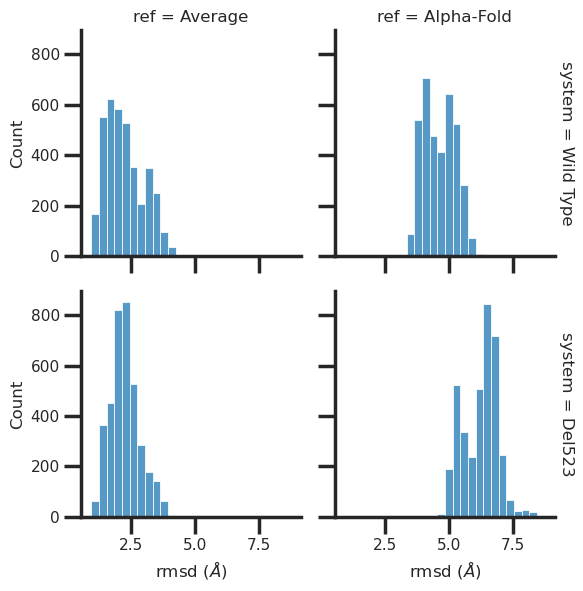

In [38]:
#sb.scatterplot(x=totc_rmsd['time'],y=totc_rmsd['rmsd'])
g=sb.displot(
    totc_rmsd, x="rmsd", col="ref", row="system",
    binwidth=0.3, height=3, facet_kws=dict(margin_titles=True),
)

#g.set_titles(row_template=)  # Remove the marginal titles on the right side

# Rewrite the top-row axis titles
#custom_colnames = ["Average", "Alpha-Fold"]
#for i, ax in enumerate(g.axes[0]):
#    ax.set_title(custom_colnames[i], fontsize=14) 
   



g.set(xlabel=r'rmsd ($\AA$)')
plt.savefig('rmsd_histplot.png')

In [5]:
COM_traj=[]
REPS=['1','2','3']
#trajectories data
for sys in systems:
    #print(sys)
    for rep in REPS:
        if (sys=='wt'):
        #print(ref)
            temp=pd.read_csv('COM_TM/dist_COM_traj_'+sys+'_'+'W'+rep+'.dat',delimiter=" ",
                         usecols=[0,1],skipinitialspace=True,names=('Frames','distance'),skiprows=1)
            temp['system']='Wild Type'
        else:
            temp=pd.read_csv('COM_TM/dist_COM_traj_'+sys+'_'+'M'+rep+'.dat',delimiter=" ",
                         usecols=[0,1],skipinitialspace=True,names=('Frames','distance'),skiprows=1)
            temp['system']='Del523'
       
        temp['rep']=rep
        COM_traj.append(temp)

tot_COM_traj=pd.concat((COM_traj[i] for i,j in enumerate(COM_traj)),ignore_index=True)
tot_COM_traj.head()

,Frames,distance,system,rep
0,1,41.9770,Wild Type,1
1,2,42.0336,Wild Type,1
2,3,41.7331,Wild Type,1
3,4,41.6213,Wild Type,1
4,5,41.7449,Wild Type,1


In [6]:
#average reference 
REPS=['1','2','3']
COM_ave=[]
for sys in systems:
    for rep in REPS:
        if (sys=='wt'):
            temp=pd.read_csv('COM_TM/dist_COM_ave_'+sys+'_'+'W'+rep+'.dat',delimiter=" ",
                         usecols=[0,1],skipinitialspace=True,names=('Frames','distance'),
                        skiprows=1)
        else:
            temp=pd.read_csv('COM_TM/dist_COM_ave_'+sys+'_'+'M'+rep+'.dat',delimiter=" ",
                         usecols=[0,1],skipinitialspace=True,names=('Frames','distance'),
                        skiprows=1)
        temp['rep']=rep
        temp['system']=sys
        if (sys=='wt'):
            temp['system']='Wild Type'
        else:
            temp['system']='Del523'
       
        temp['rep']=rep
        COM_ave.append(temp)
tot_COM_ave=pd.concat((COM_ave[i] for i,j in enumerate(COM_ave)),ignore_index=True)

In [191]:
#crystal and AF reference
ref_1kpk=pd.read_csv('COM_TM/dist_COM_1kpk.dat',delimiter=" ",
                         usecols=[0,1],skipinitialspace=True,names=('Frames','distance'),
                        skiprows=1)
ref_3org=pd.read_csv('COM_TM/dist_COM_3org.dat',delimiter=" ",
                         usecols=[0,1],skipinitialspace=True,names=('Frames','distance'),
                        skiprows=1)
ref_wt_AF=pd.read_csv('COM_TM/dist_COM_AF_wt.dat',delimiter=" ",
                         usecols=[0,1],skipinitialspace=True,names=('Frames','distance'),
                        skiprows=1)
ref_mut_AF=pd.read_csv('COM_TM/dist_COM_AF_mut.dat',delimiter=" ",
                         usecols=[0,1],skipinitialspace=True,names=('Frames','distance'),
                        skiprows=1)

In [8]:
tot_COM_ave[(tot_COM_ave['system']=='Wild Type')&(tot_COM_ave['rep']=='1')]['distance'].values


array([42.9289])

In [43]:
np.arange(3)

array([0, 1, 2])

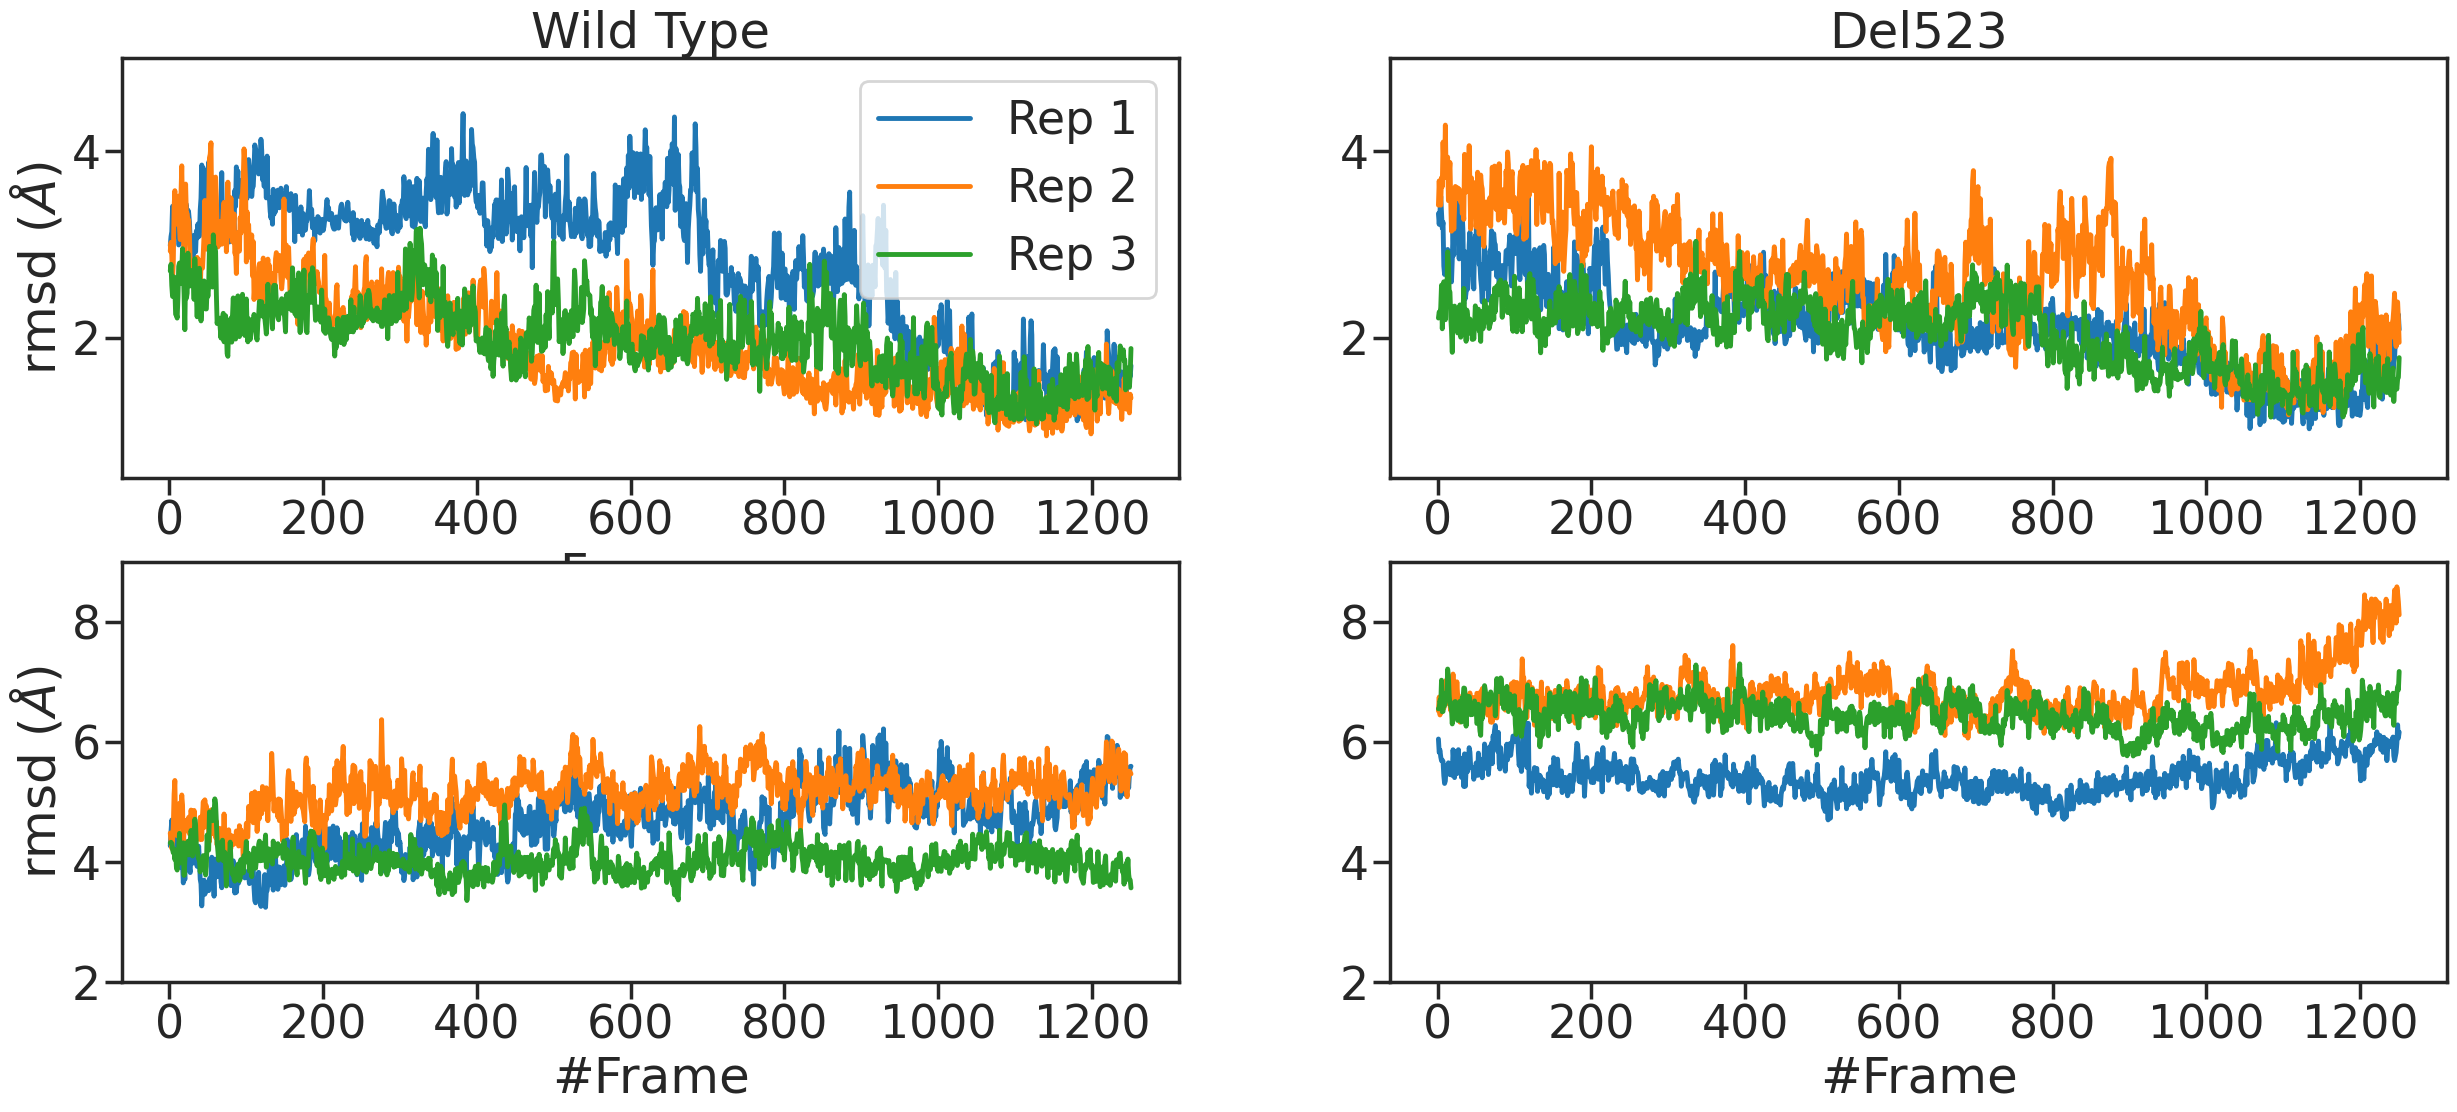

In [44]:
sb.set_style('ticks')
colors_ = np.asarray(sb.color_palette().as_hex())
#print(colors_)
sb.set_context("poster", font_scale=1.5,rc={"lines.linewidth": 3.5})    
f,axes=plt.subplots(2,2,figsize=(30,12))
for i,ax in enumerate(axes.flat):
    if (i==0): 
        ax.set_title('Wild Type')
        for j in np.arange(3):
            ax.set_ylabel(r'rmsd ($\AA$)')
            tmp=rmsdc[(rmsdc['system']=='Wild Type')&(rmsdc['rep']==str(j+1))&(rmsdc['ref']=='Average')]
            sb.lineplot(data=tmp,x='Frames',y='rmsd', ax=ax,label='Rep '+str(j+1),palette=colors_[j])
            ax.set_ylim(0.5,5)
    elif (i==2):
        ax.set_title('')
        for j in np.arange(3):
            tmp=rmsdc[(rmsdc['system']=='Wild Type')&(rmsdc['rep']==str(j+1))&(rmsdc['ref']=='Alpha-Fold')]
            sb.lineplot(data=tmp,x='Frames',y='rmsd',ax=ax, palette=colors_[j])
            ax.set_ylabel(r'rmsd ($\AA$)')
            ax.set_xlabel('#Frame')
            ax.set_ylim(2,9)
            
            
    elif (i==1):
        ax.set_title('Del523')
        for j in np.arange(3):
            tmp=rmsdc[(rmsdc['system']=='Del523')&(rmsdc['rep']==str(j+1))&(rmsdc['ref']=='Average')]
            sb.lineplot(data=tmp,x='Frames',y='rmsd', ax=ax,palette=colors_[j])
            ax.set_ylabel('')
            ax.set_xlabel('')
            ax.set_ylim(0.5,5)
         
    elif (i==3):
        ax.set_title('') 
        for j in np.arange(3):
            tmp=rmsdc[(rmsdc['system']=='Del523')&(rmsdc['rep']==str(j+1))&(rmsdc['ref']=='Alpha-Fold')]
            sb.lineplot(data=tmp,x='Frames',y='rmsd', ax=ax,palette=colors_[j])
            ax.set_xlabel('#Frame')
            ax.set_ylabel('')
            ax.set_ylim(2,9)     
    #ax.set_ylim(30,45)
    #ax.set_title(wc_names[i])
    #ax.set_xlabel('')
    #ax.set_ylabel('')
    #if ((i==0) or (i==3)):
    #    ax.set_ylabel('PC')
    #if ((i==3) or (i==4) or (i==5)):
    #    ax.set_xlabel('Frames')
f.savefig('rmsd_lineplot.png')

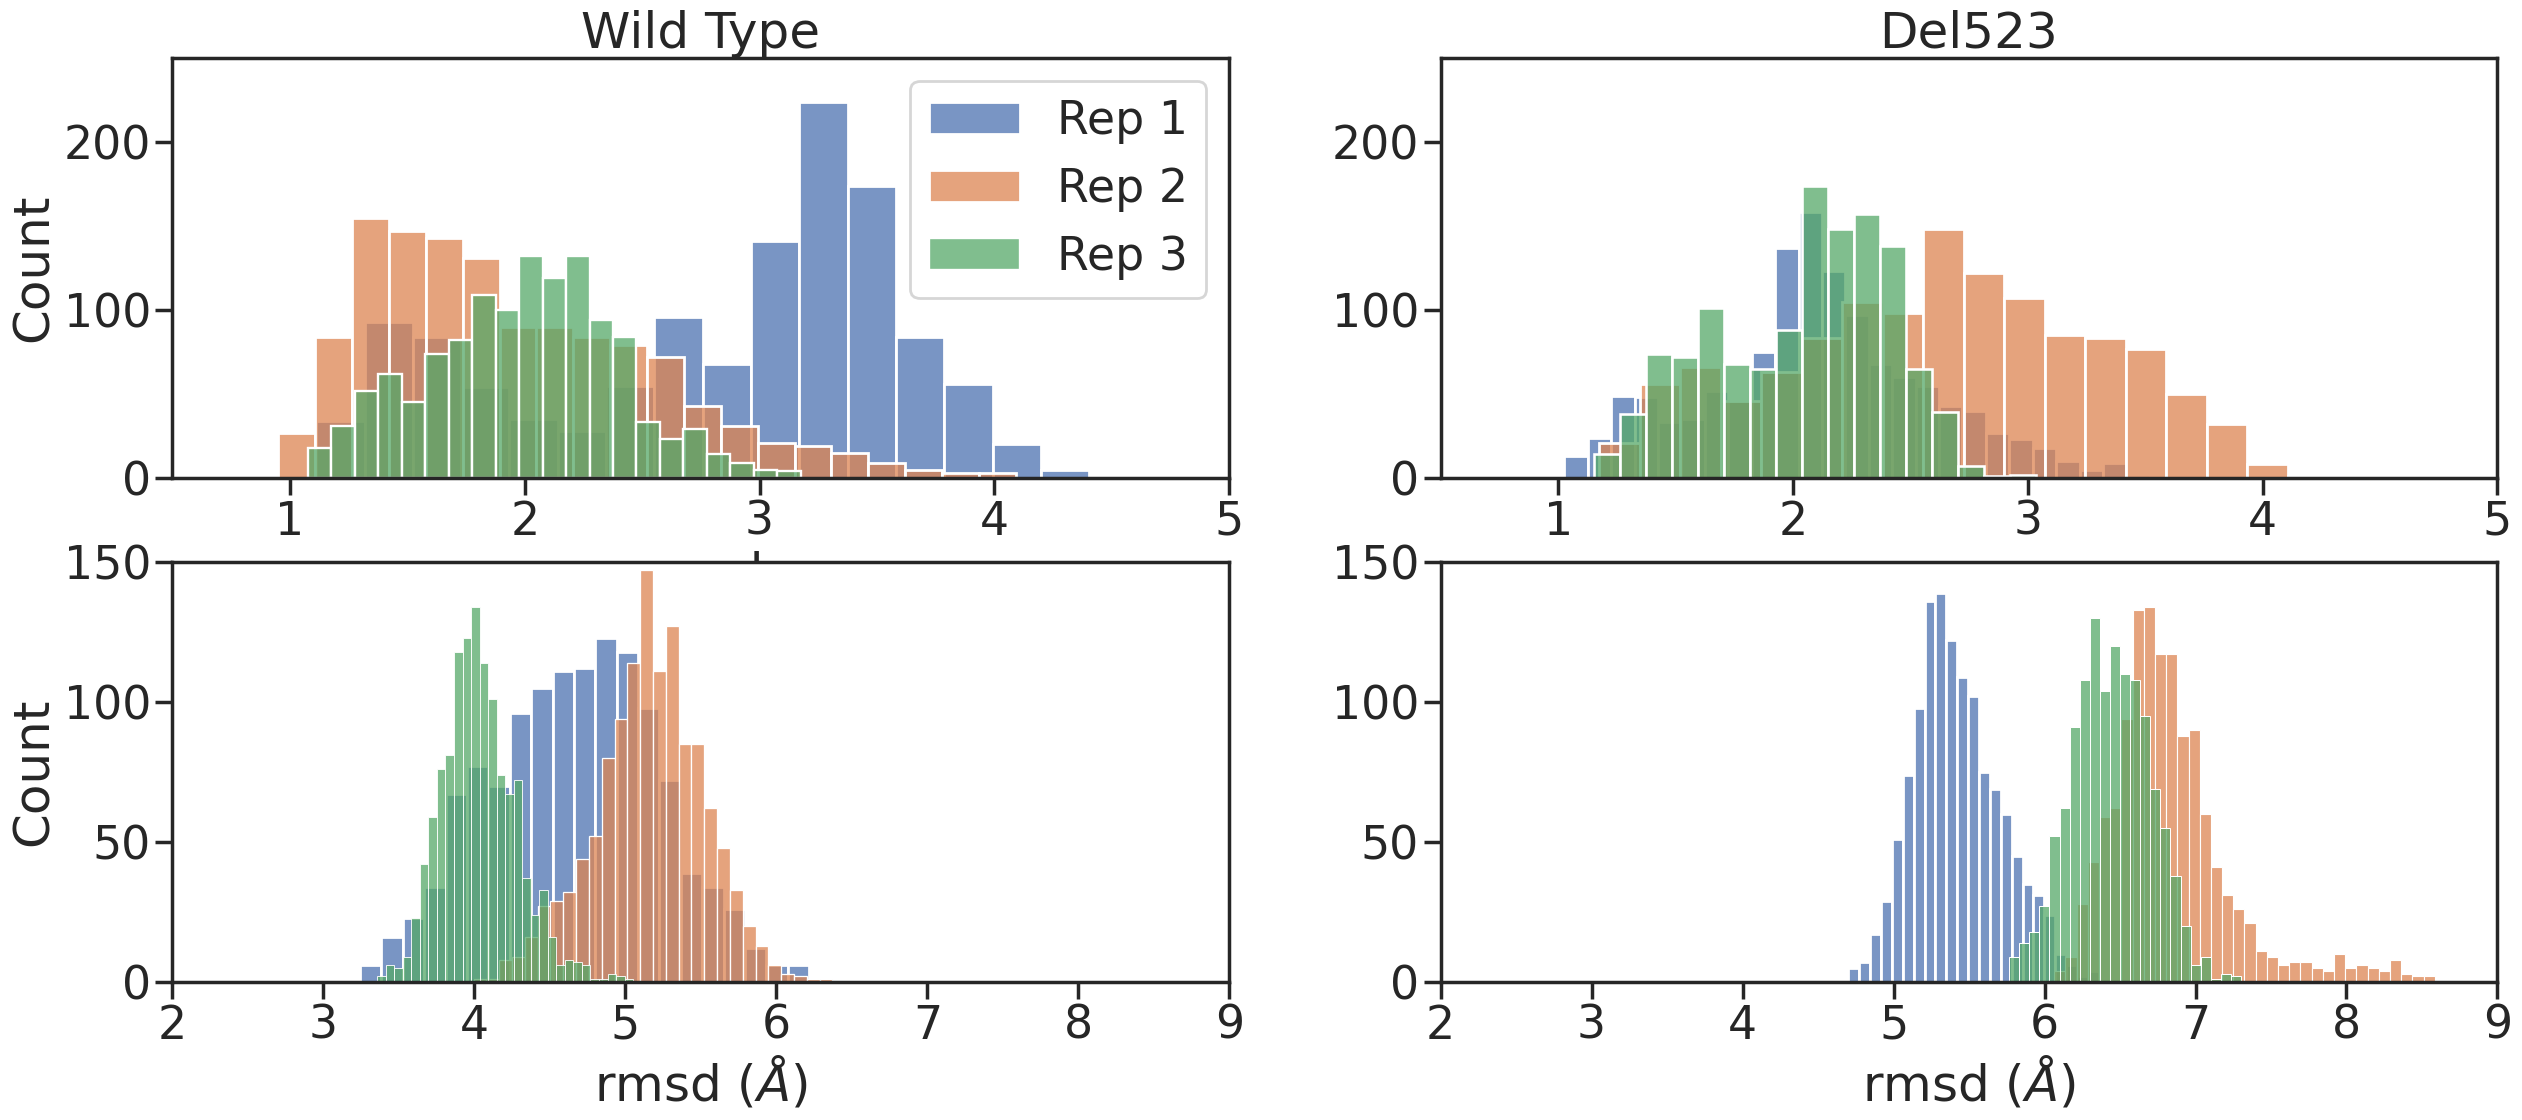

In [224]:
sb.set_style('ticks')
colors_ = np.asarray(sb.color_palette().as_hex())
#print(colors_)
sb.set_context("poster", font_scale=1.5,rc={"lines.linewidth": 3.5})    
f,axes=plt.subplots(2,2,figsize=(30,12))
for i,ax in enumerate(axes.flat):
    if (i==0): 
        ax.set_title('Wild Type')
        for j in np.arange(3):
            ax.set_ylabel(r'rmsd ($\AA$)')
            tmp=rmsdc[(rmsdc['system']=='Wild Type')&(rmsdc['rep']==str(j+1))&(rmsdc['ref']=='Average')]
            sb.histplot(data=tmp,x='rmsd', ax=ax,label='Rep '+str(j+1),color=colors_[j])
            ax.set_xlim(0.5,5)
            ax.set_ylabel('Count')
            ax.set_ylim(0,250) 
            ax.legend()
    elif (i==2):
        ax.set_title('')
        for j in np.arange(3):
            tmp=rmsdc[(rmsdc['system']=='Wild Type')&(rmsdc['rep']==str(j+1))&(rmsdc['ref']=='Alpha-Fold')]
            sb.histplot(data=tmp,x='rmsd',ax=ax, color=colors_[j])
            ax.set_xlabel(r'rmsd ($\AA$)')
            ax.set_xlim(2,9)
            ax.set_ylim(0,150) 
            
            
    elif (i==1):
        ax.set_title('Del523')
        for j in np.arange(3):
            tmp=rmsdc[(rmsdc['system']=='Del523')&(rmsdc['rep']==str(j+1))&(rmsdc['ref']=='Average')]
            sb.histplot(data=tmp,x='rmsd', ax=ax,color=colors_[j])
            ax.set_ylabel('')
            ax.set_xlabel('')
            ax.set_xlim(0.5,5)
            ax.set_ylim(0,250) 
         
    elif (i==3):
        ax.set_title('') 
        for j in np.arange(3):
            tmp=rmsdc[(rmsdc['system']=='Del523')&(rmsdc['rep']==str(j+1))&(rmsdc['ref']=='Alpha-Fold')]
            sb.histplot(data=tmp,x='rmsd', ax=ax,color=colors_[j])
            ax.set_xlabel(r'rmsd ($\AA$)')
            ax.set_ylabel('')
            ax.set_xlim(2,9)  
            ax.set_ylim(0,150)     
    #ax.set_ylim(30,45)
    #ax.set_title(wc_names[i])
    #ax.set_xlabel('')
    #ax.set_ylabel('')
    #if ((i==0) or (i==3)):
    #    ax.set_ylabel('PC')
    #if ((i==3) or (i==4) or (i==5)):
    #    ax.set_xlabel('Frames')
f.savefig('rmsd_histplot_reps.png')

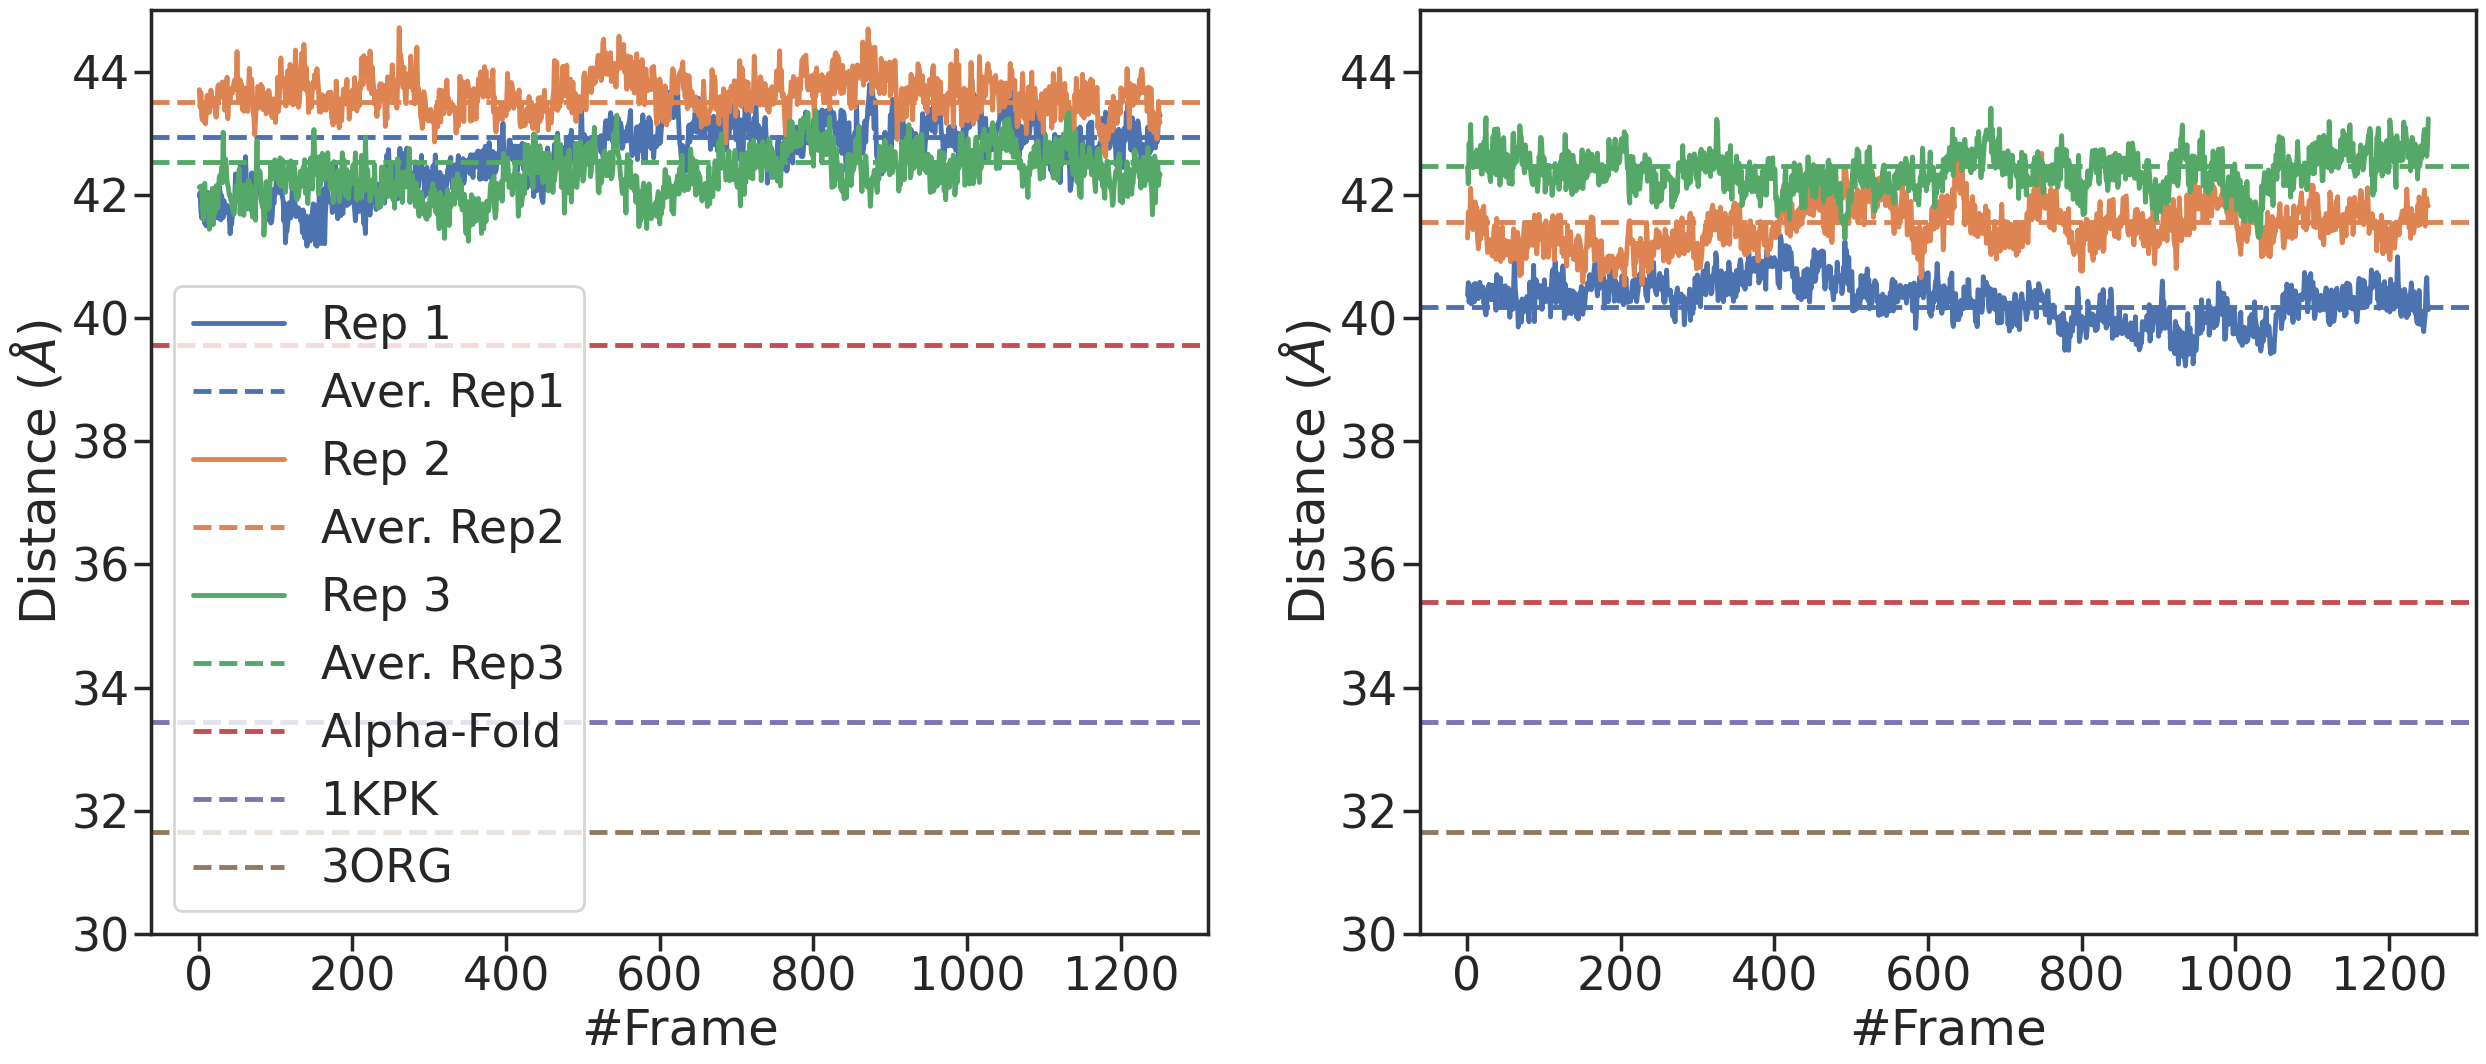

In [228]:
#COM PLOT
sb.set_style('ticks')
colors_ = np.asarray(sb.color_palette().as_hex())
#print(colors_)
sb.set_context("poster", font_scale=1.5,rc={"lines.linewidth": 3.5})    
f,axes=plt.subplots(1,2,figsize=(30,12))
for i,ax in enumerate(axes.flat):
    if (i==0): 
        #ax.set_title('Wild Type')
        for j in np.arange(3):
 #           print(j)
            tmp=tot_COM_traj[(tot_COM_traj['system']=='Wild Type')&(tot_COM_traj['rep']==str(j+1))]
            sb.lineplot(data=tmp,x='Frames',y='distance', ax=ax,label='Rep '+str(j+1),palette=colors_[j])
            
            tmp2=tot_COM_ave[(tot_COM_ave['system']=='Wild Type')&(tot_COM_ave['rep']==str(j+1))]
            ax.axhline(y=tmp2['distance'].values,color=colors_[j],ls='--',label='Aver. Rep'+str(j+1))
            
        ax.axhline(y=ref_wt_AF['distance'].values,color=colors_[3],label='Alpha-Fold',ls='--',visible=True)
        ax.axhline(y=ref_1kpk['distance'].values,color=colors_[4],label='1KPK',ls='--')
        ax.axhline(y=ref_3org['distance'].values,color=colors_[5],label='3ORG',ls='--')
        ax.legend()
    else:
        #ax.set_title('Del523')
        for j in np.arange(3):
            tmp=tot_COM_traj[(tot_COM_traj['system']=='Del523')&(tot_COM_traj['rep']==str(j+1))]
            sb.lineplot(data=tmp,x='Frames',y='distance', ax=ax,palette=colors_[j])
            
            tmp2=tot_COM_ave[(tot_COM_ave['system']=='Del523')&(tot_COM_ave['rep']==str(j+1))]
            ax.axhline(y=tmp2['distance'].values,color=colors_[j],ls='--')
            
        ax.axhline(y=ref_mut_AF['distance'].values,color=colors_[3],ls='--')
        ax.axhline(y=ref_1kpk['distance'].values,color=colors_[4],ls='--')
        ax.axhline(y=ref_3org['distance'].values,color=colors_[5],ls='--')
    ax.set_ylim(30,45)
    ax.set_xlabel('#Frame')
    ax.set_ylabel(r'Distance ($\AA$)')
    
    #ax.set_title(wc_names[i])
    #ax.set_xlabel('')
    #ax.set_ylabel('')
    #if ((i==0) or (i==3)):
    #    ax.set_ylabel('PC')
    #if ((i==3) or (i==4) or (i==5)):
    #    ax.set_xlabel('Frames')
f.savefig('dist_COM.png')

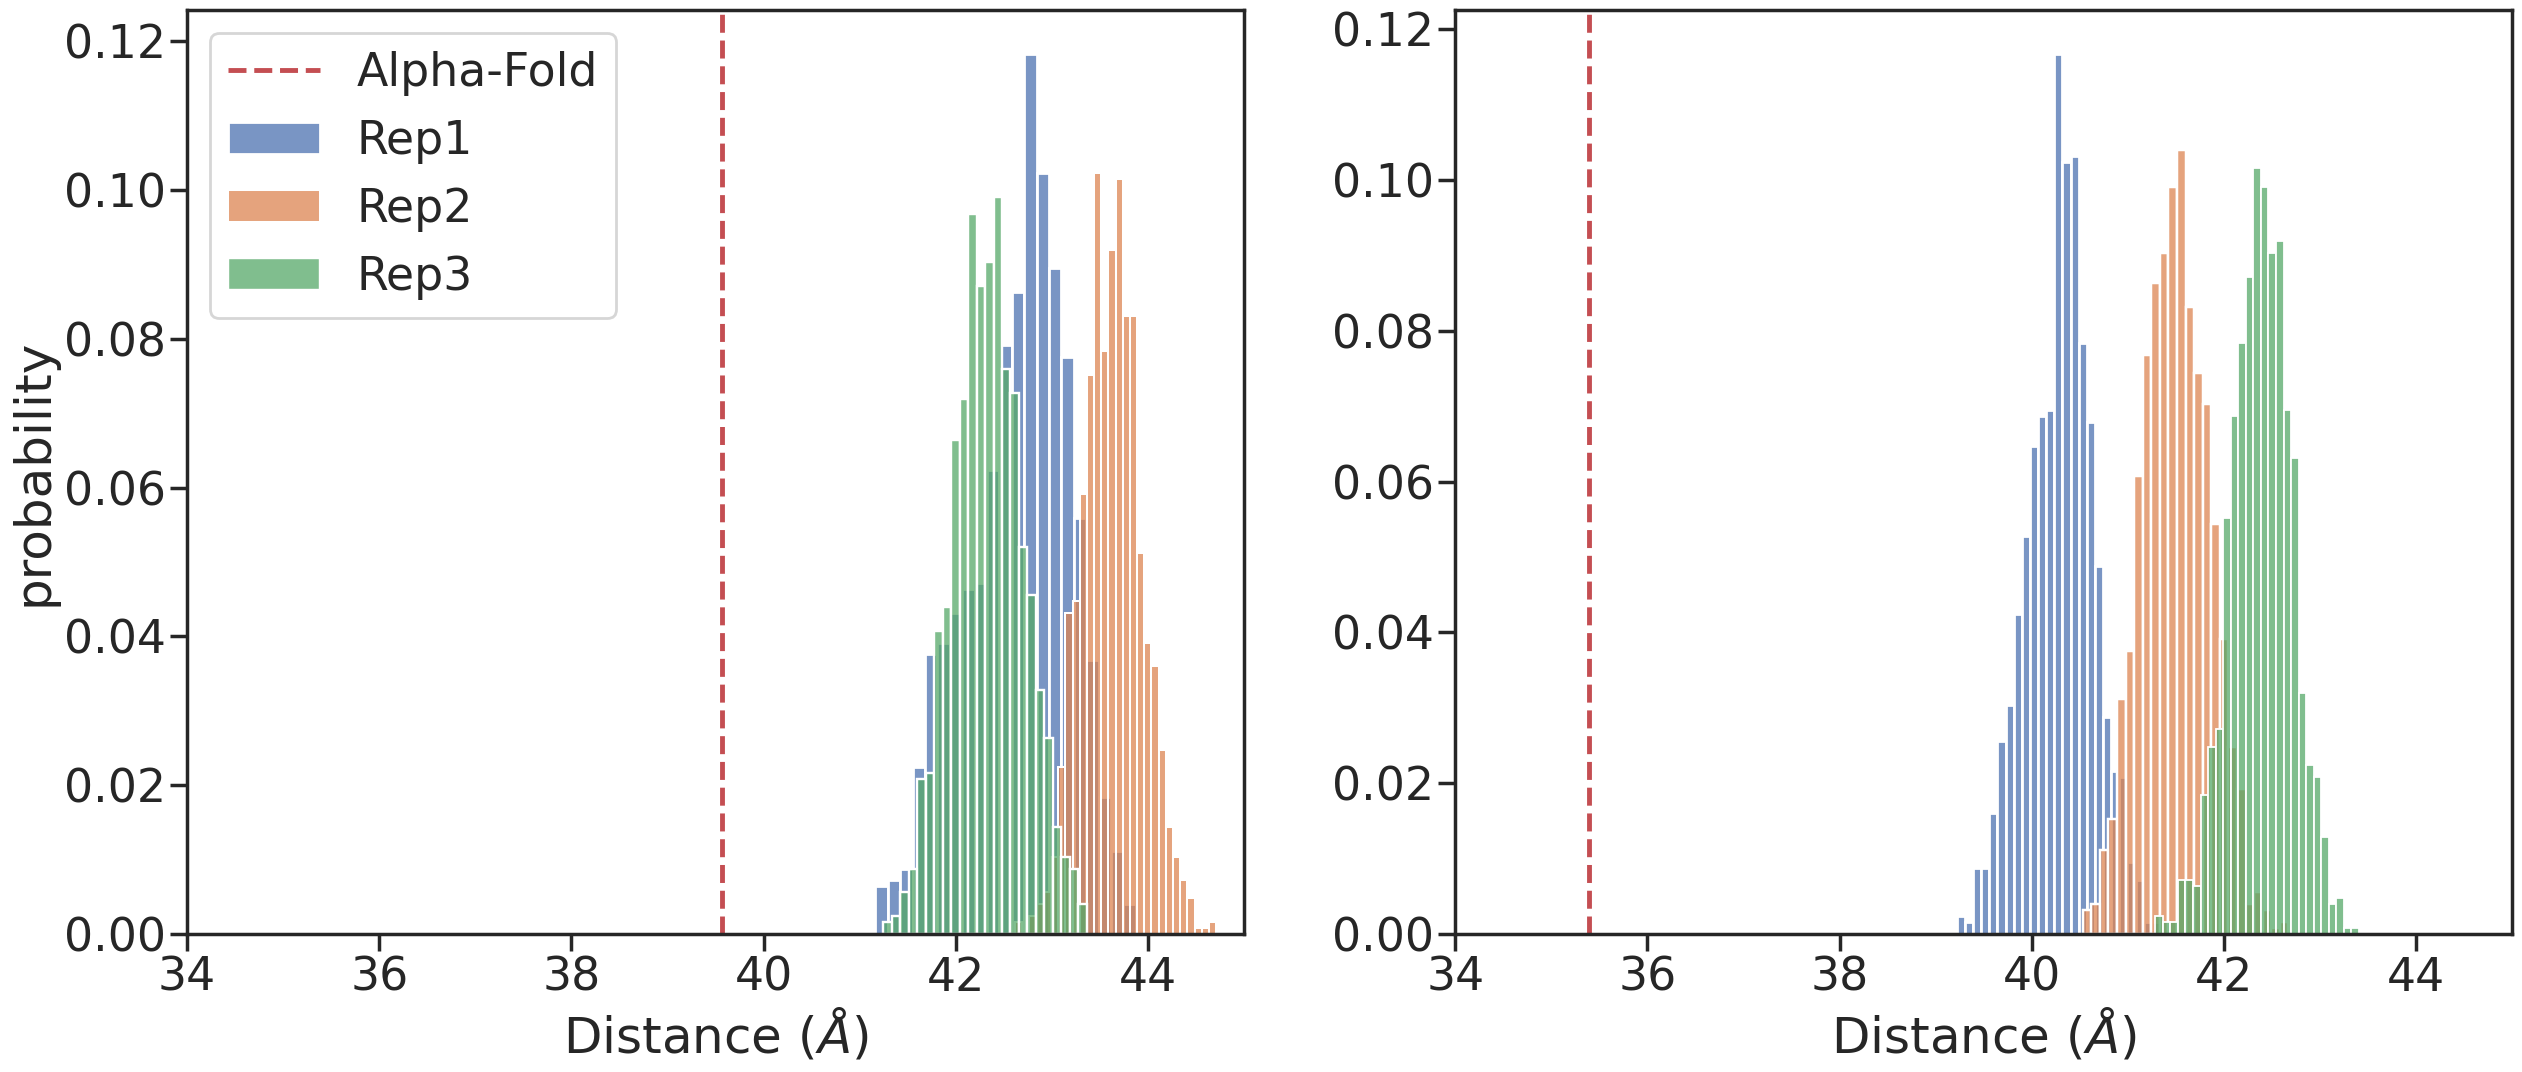

In [261]:
#COM histogram
sb.set_style('ticks')
colors_ = np.asarray(sb.color_palette().as_hex())
#print(colors_)
sb.set_context("poster", font_scale=1.5,rc={"lines.linewidth": 3.5})    
f,axes=plt.subplots(1,2,figsize=(30,12))
for i,ax in enumerate(axes.flat):
    if (i==0): 
        #ax.set_title('Wild Type')
        for j in np.arange(3):
 #           print(j)
            tmp=tot_COM_traj[(tot_COM_traj['system']=='Wild Type')&(tot_COM_traj['rep']==str(j+1))]
            sb.histplot(data=tmp,x='distance',ax=ax,color=colors_[j],label='Rep'+str(j+1),stat='probability')
            
            #tmp2=tot_COM_ave[(tot_COM_ave['system']=='Wild Type')&(tot_COM_ave['rep']==str(j+1))]
            #ax.axvline(x=tmp2['distance'].values,color=colors_[j],ls='--',label='Aver. Rep'+str(j+1))
            
        ax.axvline(x=ref_wt_AF['distance'].values,color=colors_[3],label='Alpha-Fold',ls='--',visible=True)
        #ax.axvline(x=ref_1kpk['distance'].values,color=colors_[4],label='1KPK',ls='--')
        #ax.axvline(x=ref_3org['distance'].values,color=colors_[5],label='3ORG',ls='--')
        ax.legend()
        ax.set_ylabel('probability')

    else:
        #ax.set_title('Del523')
        for j in np.arange(3):
            tmp=tot_COM_traj[(tot_COM_traj['system']=='Del523')&(tot_COM_traj['rep']==str(j+1))]
            sb.histplot(data=tmp,x='distance',ax=ax,color=colors_[j],stat='probability')
            
            #tmp2=tot_COM_ave[(tot_COM_ave['system']=='Del523')&(tot_COM_ave['rep']==str(j+1))]
            #ax.axvline(x=tmp2['distance'].values,color=colors_[j],ls='--')
            
        ax.axvline(x=ref_mut_AF['distance'].values,color=colors_[3],ls='--')
        #ax.axvline(x=ref_1kpk['distance'].values,color=colors_[4],ls='--')
        #ax.axvline(x=ref_3org['distance'].values,color=colors_[5],ls='--')
        ax.set_ylabel('')
    ax.set_xlim(34,45)
    ax.set_xlabel(r'Distance ($\AA$)')
    
f.savefig('dist_COM_histograms.png')

## Secondary structure analysis

In [121]:
data=[]
path='/orozco/projects/E-Dent/VERONICA/DIMER_LARGER/PLAIN_MD/analysis/supporting/secstruct/heatplot'
files=[]
systems=['wt','mut']
for index,name in enumerate(systems):
    ftemp='{path}/ss_ave_{system}.gnu.sum'.format(path=path,system=name)
    dtemp=pd.read_csv(ftemp,delimiter=" ",skipinitialspace=True)
    dtemp['system']=name
    dtemp['Resid']=dtemp['#Residue']+58
    dtemp['Ext']=dtemp['Extended']
    data.append(dtemp)
    
            #plumed_files.append(temp) 
#I am concatenating the two heatplots (one for wt, one for mut)
ss_ave_conc=pd.concat((data[n] for n,m in enumerate(data)),ignore_index=True)
#ss_ave_conc.head()

In [16]:
ss_conc.head()

,#Residue,Extended,Bridge,3-10,Alpha,Pi,Turn,Bend,system,chain,rep,Resid,Ext
0,1,0.0,0.0,0.0,0.0000,0.0,0.000,0.0,wt,A,1,59,0.0
1,2,0.0,0.0,0.0,0.9482,0.0,0.000,0.0,wt,A,1,60,0.0
2,3,0.0,0.0,0.0,0.9960,0.0,0.004,0.0,wt,A,1,61,0.0
3,4,0.0,0.0,0.0,0.9960,0.0,0.004,0.0,wt,A,1,62,0.0
4,5,0.0,0.0,0.0,1.0000,0.0,0.000,0.0,wt,A,1,63,0.0


In [10]:
wt_AF=pd.read_csv('secstruct/heatplot/ss_wt_AF.dat.sum',delimiter=" ",skipinitialspace=True)
wt_AF['system']=sys
wt_AF['rep']=rep
wt_AF['Resid']=wt_AF['#Residue']+58
wt_AF['Ext']=wt_AF['Extended']

mut_AF=pd.read_csv('secstruct/heatplot/ss_mut_AF.dat.sum',delimiter=" ",skipinitialspace=True)
mut_AF['system']=sys
mut_AF['rep']=rep
mut_AF['Resid']=mut_AF['#Residue']+58
mut_AF['Ext']=mut_AF['Extended']
            

In [57]:
ss_conc[(ss_conc['system']==systems[0])][453:476].head()

,#Residue,Extended,Bridge,3-10,Alpha,Pi,Turn,Bend,system,chain,rep,Resid,Ext
453,454,0.0,0.0,0.0,0.9960,0.0,0.0040,0.000,wt,A,1,512,0.0
454,455,0.0,0.0,0.0,0.9960,0.0,0.0040,0.000,wt,A,1,513,0.0
455,456,0.0,0.0,0.0,0.9203,0.0,0.0797,0.000,wt,A,1,514,0.0
456,457,0.0,0.0,0.0,0.4701,0.0,0.5219,0.008,wt,A,1,515,0.0
457,458,0.0,0.0,0.0,0.0000,0.0,0.0000,0.000,wt,A,1,516,0.0


In [48]:
wt_AF.tail()

,#Residue,Extended,Bridge,3-10,Alpha,Pi,Turn,Bend,system,rep,Resid,Ext
671,672,0.0,0.0,0.0,1.0,0.0,0.0,0.0,mut,3,730,0.0
672,673,0.0,0.0,0.0,1.0,0.0,0.0,0.0,mut,3,731,0.0
673,674,0.0,0.0,0.0,1.0,0.0,0.0,0.0,mut,3,732,0.0
674,675,0.0,0.0,0.0,0.0,0.0,1.0,0.0,mut,3,733,0.0
675,676,0.0,0.0,0.0,0.0,0.0,0.0,0.0,mut,3,734,0.0


In [49]:
mut_AF.tail()

,#Residue,Extended,Bridge,3-10,Alpha,Pi,Turn,Bend,system,rep,Resid,Ext
670,671,0.0,0.0,0.0,1.0,0.0,0.0,0.0,mut,3,729,0.0
671,672,0.0,0.0,0.0,1.0,0.0,0.0,0.0,mut,3,730,0.0
672,673,0.0,0.0,0.0,1.0,0.0,0.0,0.0,mut,3,731,0.0
673,674,0.0,0.0,0.0,0.0,0.0,1.0,0.0,mut,3,732,0.0
674,675,0.0,0.0,0.0,0.0,0.0,0.0,0.0,mut,3,733,0.0


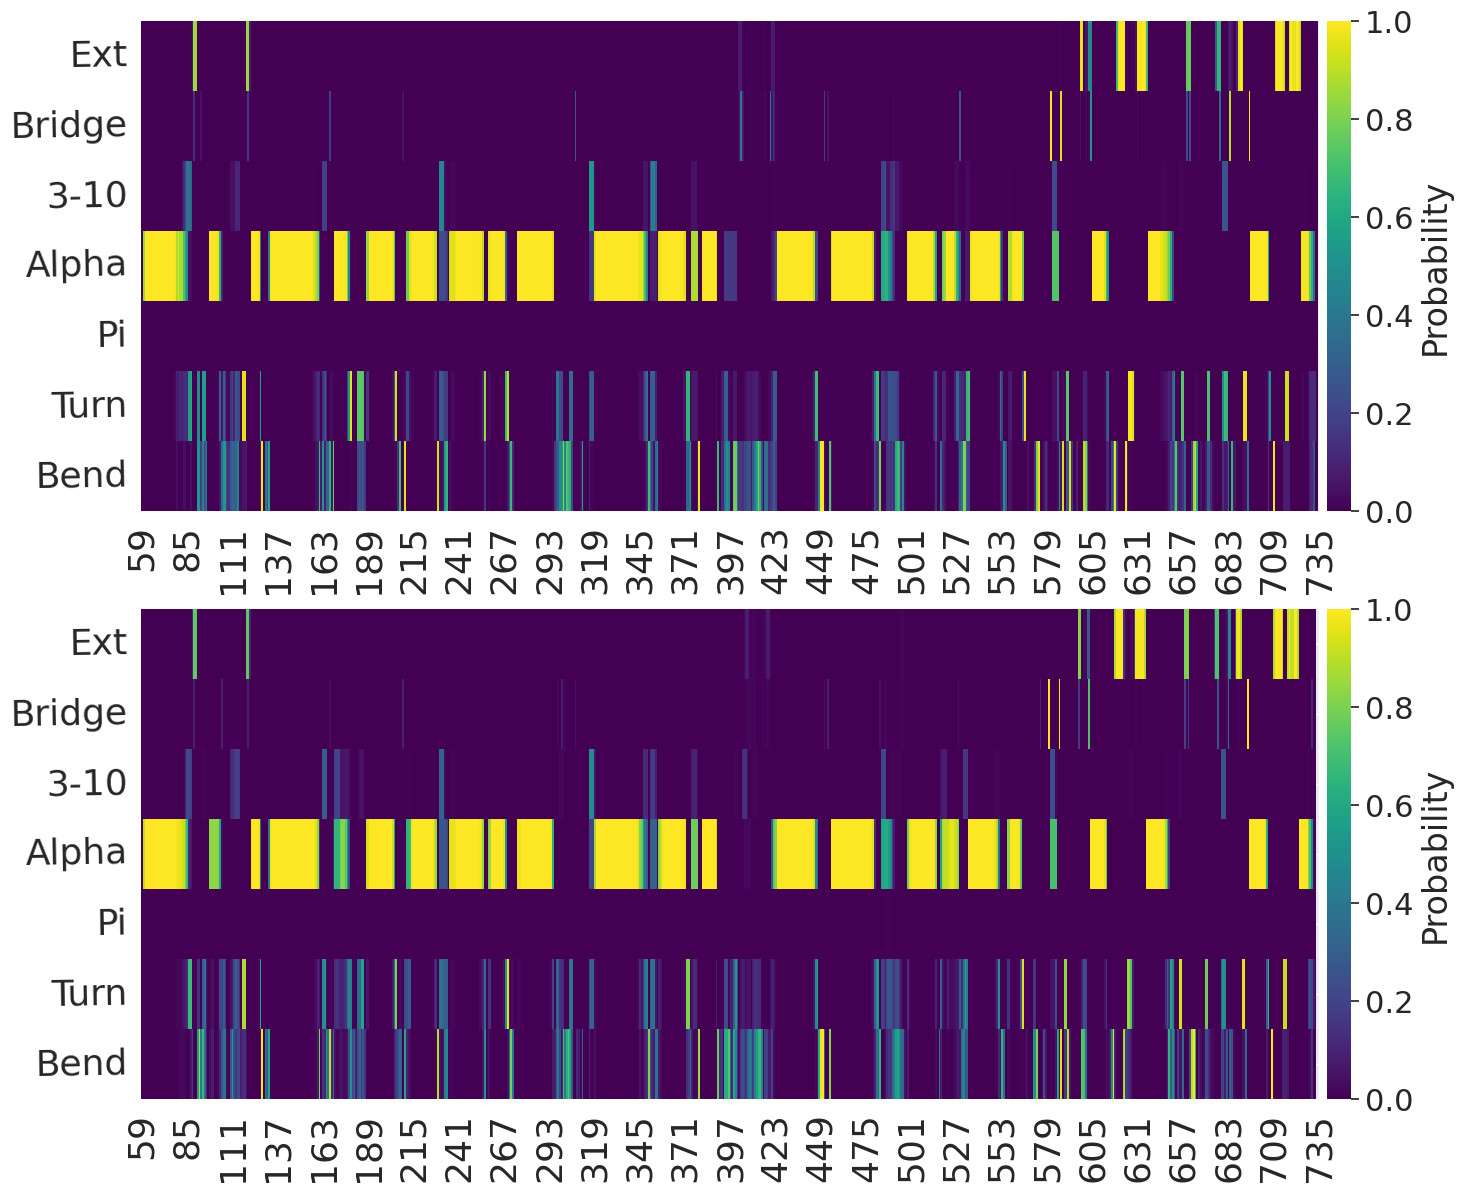

In [259]:
sel=['Ext','Bridge','3-10','Alpha','Pi','Turn','Bend']
names=['Wild Type','Del523']
systems=['wt','mut']
cbar_kws={'label':'Probability','pad':0.005}
f, axes=plt.subplots(2,1,figsize=(18,14))
for ind,ax in enumerate(axes.flat):
    
    tmpA=ss_ave_conc[(ss_ave_conc['system']==systems[ind])]
    sb.set(font_scale=2.0)
    sb.heatmap(np.transpose(tmpA[sel]),vmin=0.0,vmax=1.0,cmap='viridis', ax=ax,cbar_kws=cbar_kws,xticklabels=tmpA['Resid'])
    ax.set_xticks(ticks=np.arange(0.5,677.5,26),labels=np.arange(59,677+59,26))
    #+59 perchè labeling starts from 0
    #ax.set_title(str(names[ind]),fontsize=20)
    #ax.set_aspect('equal')
    ax.tick_params(labelsize=26,labelrotation=True,axis='y')
    ax.tick_params(labelsize=26,axis='x')
    ax.set_xlim(0,677)
    #if (ind==1):
        #ax.set_xlabel('Resid number')
f.savefig('ss_heatplot_MD.png')

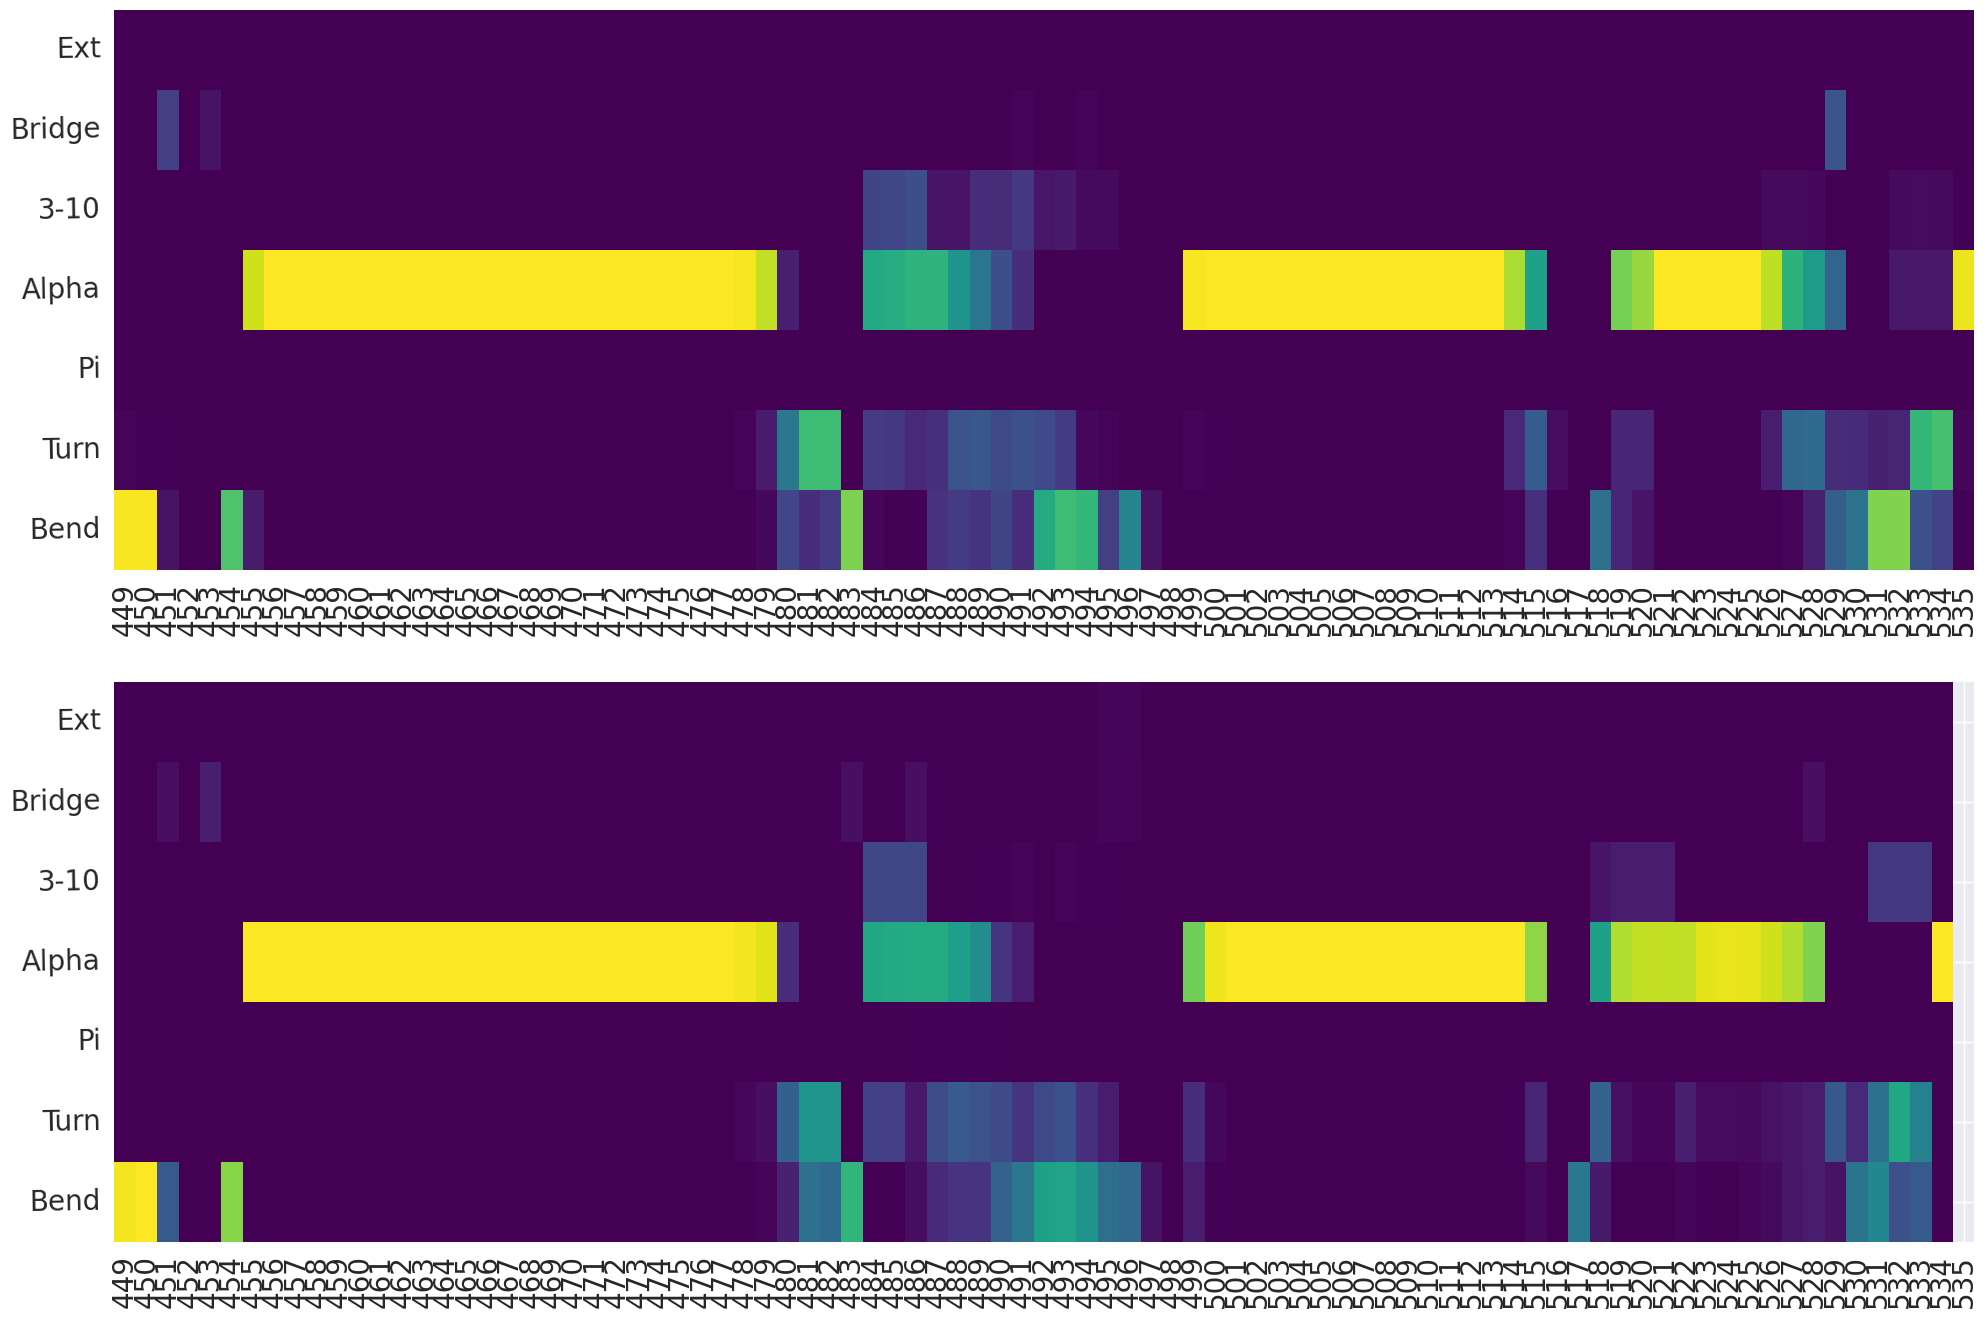

In [269]:
#ZOOM
sel=['Ext','Bridge','3-10','Alpha','Pi','Turn','Bend']
names=['Wild Type','Del523']
systems=['wt','mut']
cbar_kws={'label':'Probability','pad':0.005}
f, axes=plt.subplots(2,1,figsize=(24,16))
for ind,ax in enumerate(axes.flat):
    if (ind==0):
        tmpA=ss_ave_conc[(ss_ave_conc['system']==systems[ind])][390:477]
    else:
        tmpA=ss_ave_conc[(ss_ave_conc['system']==systems[ind])][390:476]
    sb.set(font_scale=2.5)
    #sb.heatmap(np.transpose(tmpA[sel]),vmin=0.0,vmax=1.0,cmap='viridis', ax=ax,cbar_kws=cbar_kws,center=0.5,xticklabels=tmpA['Resid'])
    #sb.heatmap(np.transpose(tmpA[sel]),vmin=0.0,vmax=1.0,cmap='viridis', ax=ax,cbar_kws=cbar_kws)
    sb.heatmap(np.transpose(tmpA[sel]),vmin=0.0,vmax=1.0,cmap='viridis', ax=ax, cbar=False)

    ax.set_xticks(ticks=np.arange(0.5,87.5,1),labels=np.arange(390+59,477+59,1))
    #+59 perché index starts from 0
    #ax.set_title(str(names[ind]),fontsize=20)
    #ax.set_aspect('equal')
    ax.tick_params(labelsize=20,labelrotation=True,axis='y')
    ax.tick_params(labelsize=20,axis='x')
    ax.set_xlim(0,87)
    

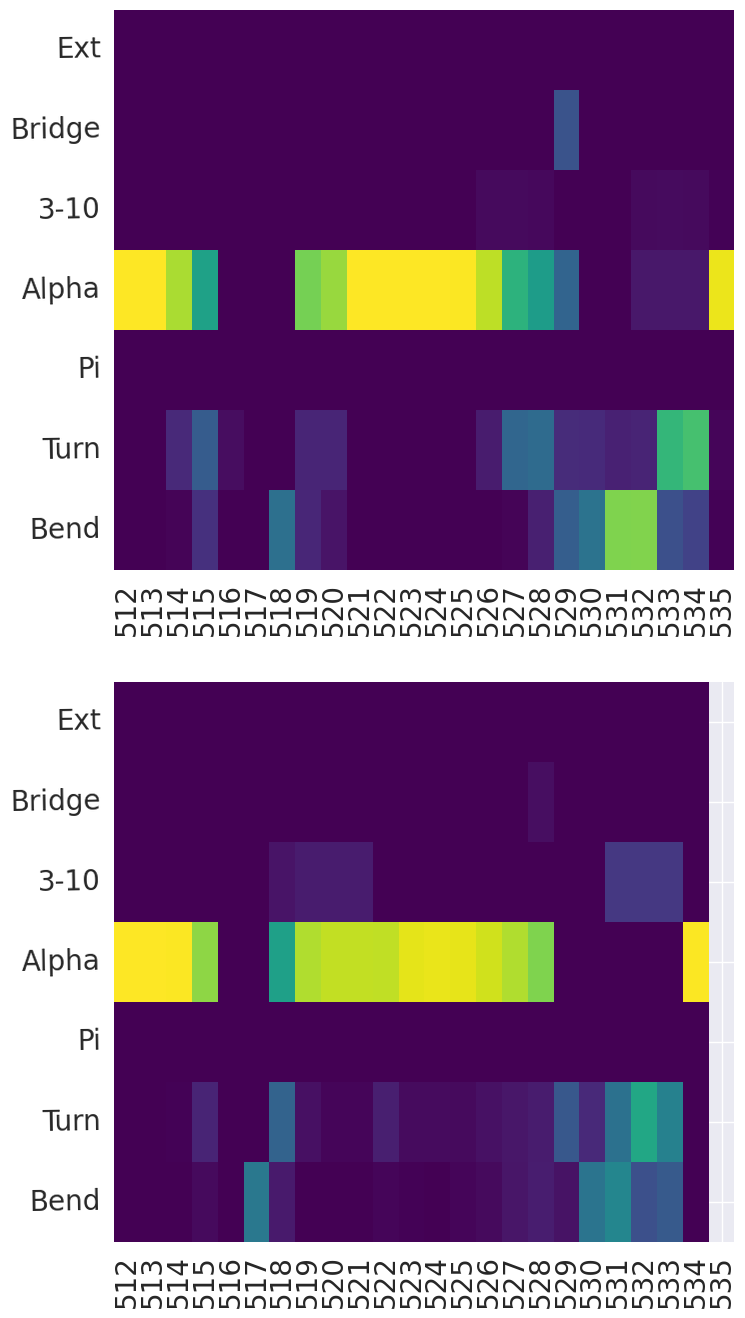

In [265]:
#ZOOM
sel=['Ext','Bridge','3-10','Alpha','Pi','Turn','Bend']
names=['Wild Type','Del523']
systems=['wt','mut']
cbar_kws={'label':'Probability','pad':0.005}
f, axes=plt.subplots(2,1,figsize=(8,16))
for ind,ax in enumerate(axes.flat):
    if (ind==0):
        tmpA=ss_ave_conc[(ss_ave_conc['system']==systems[ind])][453:477]
    else:
        tmpA=ss_ave_conc[(ss_ave_conc['system']==systems[ind])][453:476]
    sb.set(font_scale=2.5)
    #sb.heatmap(np.transpose(tmpA[sel]),vmin=0.0,vmax=1.0,cmap='viridis', ax=ax,cbar_kws=cbar_kws,center=0.5,xticklabels=tmpA['Resid'])
    #sb.heatmap(np.transpose(tmpA[sel]),vmin=0.0,vmax=1.0,cmap='viridis', ax=ax,cbar_kws=cbar_kws)
    sb.heatmap(np.transpose(tmpA[sel]),vmin=0.0,vmax=1.0,cmap='viridis', ax=ax, cbar=False)

    ax.set_xticks(ticks=np.arange(0.5,24.5,1),labels=np.arange(453+59,477+59,1))
    #+59 perché index starts from 0
    #ax.set_title(str(names[ind]),fontsize=20)
    #ax.set_aspect('equal')
    ax.tick_params(labelsize=20,labelrotation=True,axis='y')
    ax.tick_params(labelsize=20,axis='x')
    ax.set_xlim(0,24)
    
   
f.savefig('ss_heatplot_helix_MD_zoom3.png')
 

In [65]:
ssP_conc.head()

,#Residue,Extended,Bridge,3-10,Alpha,Pi,Turn,Bend,system,chain,rep,Resid,Ext
0,454,0.0,0.0,0.0,0.0,0.0,0.0000,0.0000,wt,A,1,512,0.0
1,455,0.0,0.0,0.0,0.0,0.0,0.4741,0.0000,wt,A,1,513,0.0
2,456,0.0,0.0,0.0,0.0,0.0,0.4741,0.5259,wt,A,1,514,0.0
3,457,0.0,0.0,0.0,0.0,0.0,0.4741,0.5259,wt,A,1,515,0.0
4,458,0.0,0.0,0.0,0.0,0.0,0.0000,0.0000,wt,A,1,516,0.0


In [66]:
ssP_conc.tail()

,#Residue,Extended,Bridge,3-10,Alpha,Pi,Turn,Bend,system,chain,rep,Resid,Ext
265,471,0.0,0.0,0.0,0.0,0.0,0.0000,0.0438,mut,B,3,529,0.0
266,472,0.0,0.0,0.0,0.0,0.0,0.0598,0.9402,mut,B,3,530,0.0
267,473,0.0,0.0,0.0,0.0,0.0,0.0598,0.9402,mut,B,3,531,0.0
268,474,0.0,0.0,0.0,0.0,0.0,0.0120,0.0000,mut,B,3,532,0.0
269,475,0.0,0.0,0.0,0.0,0.0,0.0000,0.0000,mut,B,3,533,0.0


In [52]:
tmpA[sel]

,Ext,Bridge,3-10,Alpha,Pi,Turn,Bend
4056,0.0,0.0,0.000,0.0000,0.0,0.0000,0.0000
4057,0.0,0.0,0.000,0.8127,0.0,0.0000,0.0000
4058,0.0,0.0,0.000,0.9880,0.0,0.0120,0.0000
4059,0.0,0.0,0.000,0.9880,0.0,0.0120,0.0000
4060,0.0,0.0,0.000,1.0000,0.0,0.0000,0.0000
...,...,...,...,...,...,...,...
8101,0.0,0.0,0.004,0.8645,0.0,0.1315,0.0000
8102,0.0,0.0,0.004,0.7968,0.0,0.1992,0.0000
8103,0.0,0.0,0.000,0.6773,0.0,0.2550,0.0558
8104,0.0,0.0,0.000,0.0398,0.0,0.0876,0.0000


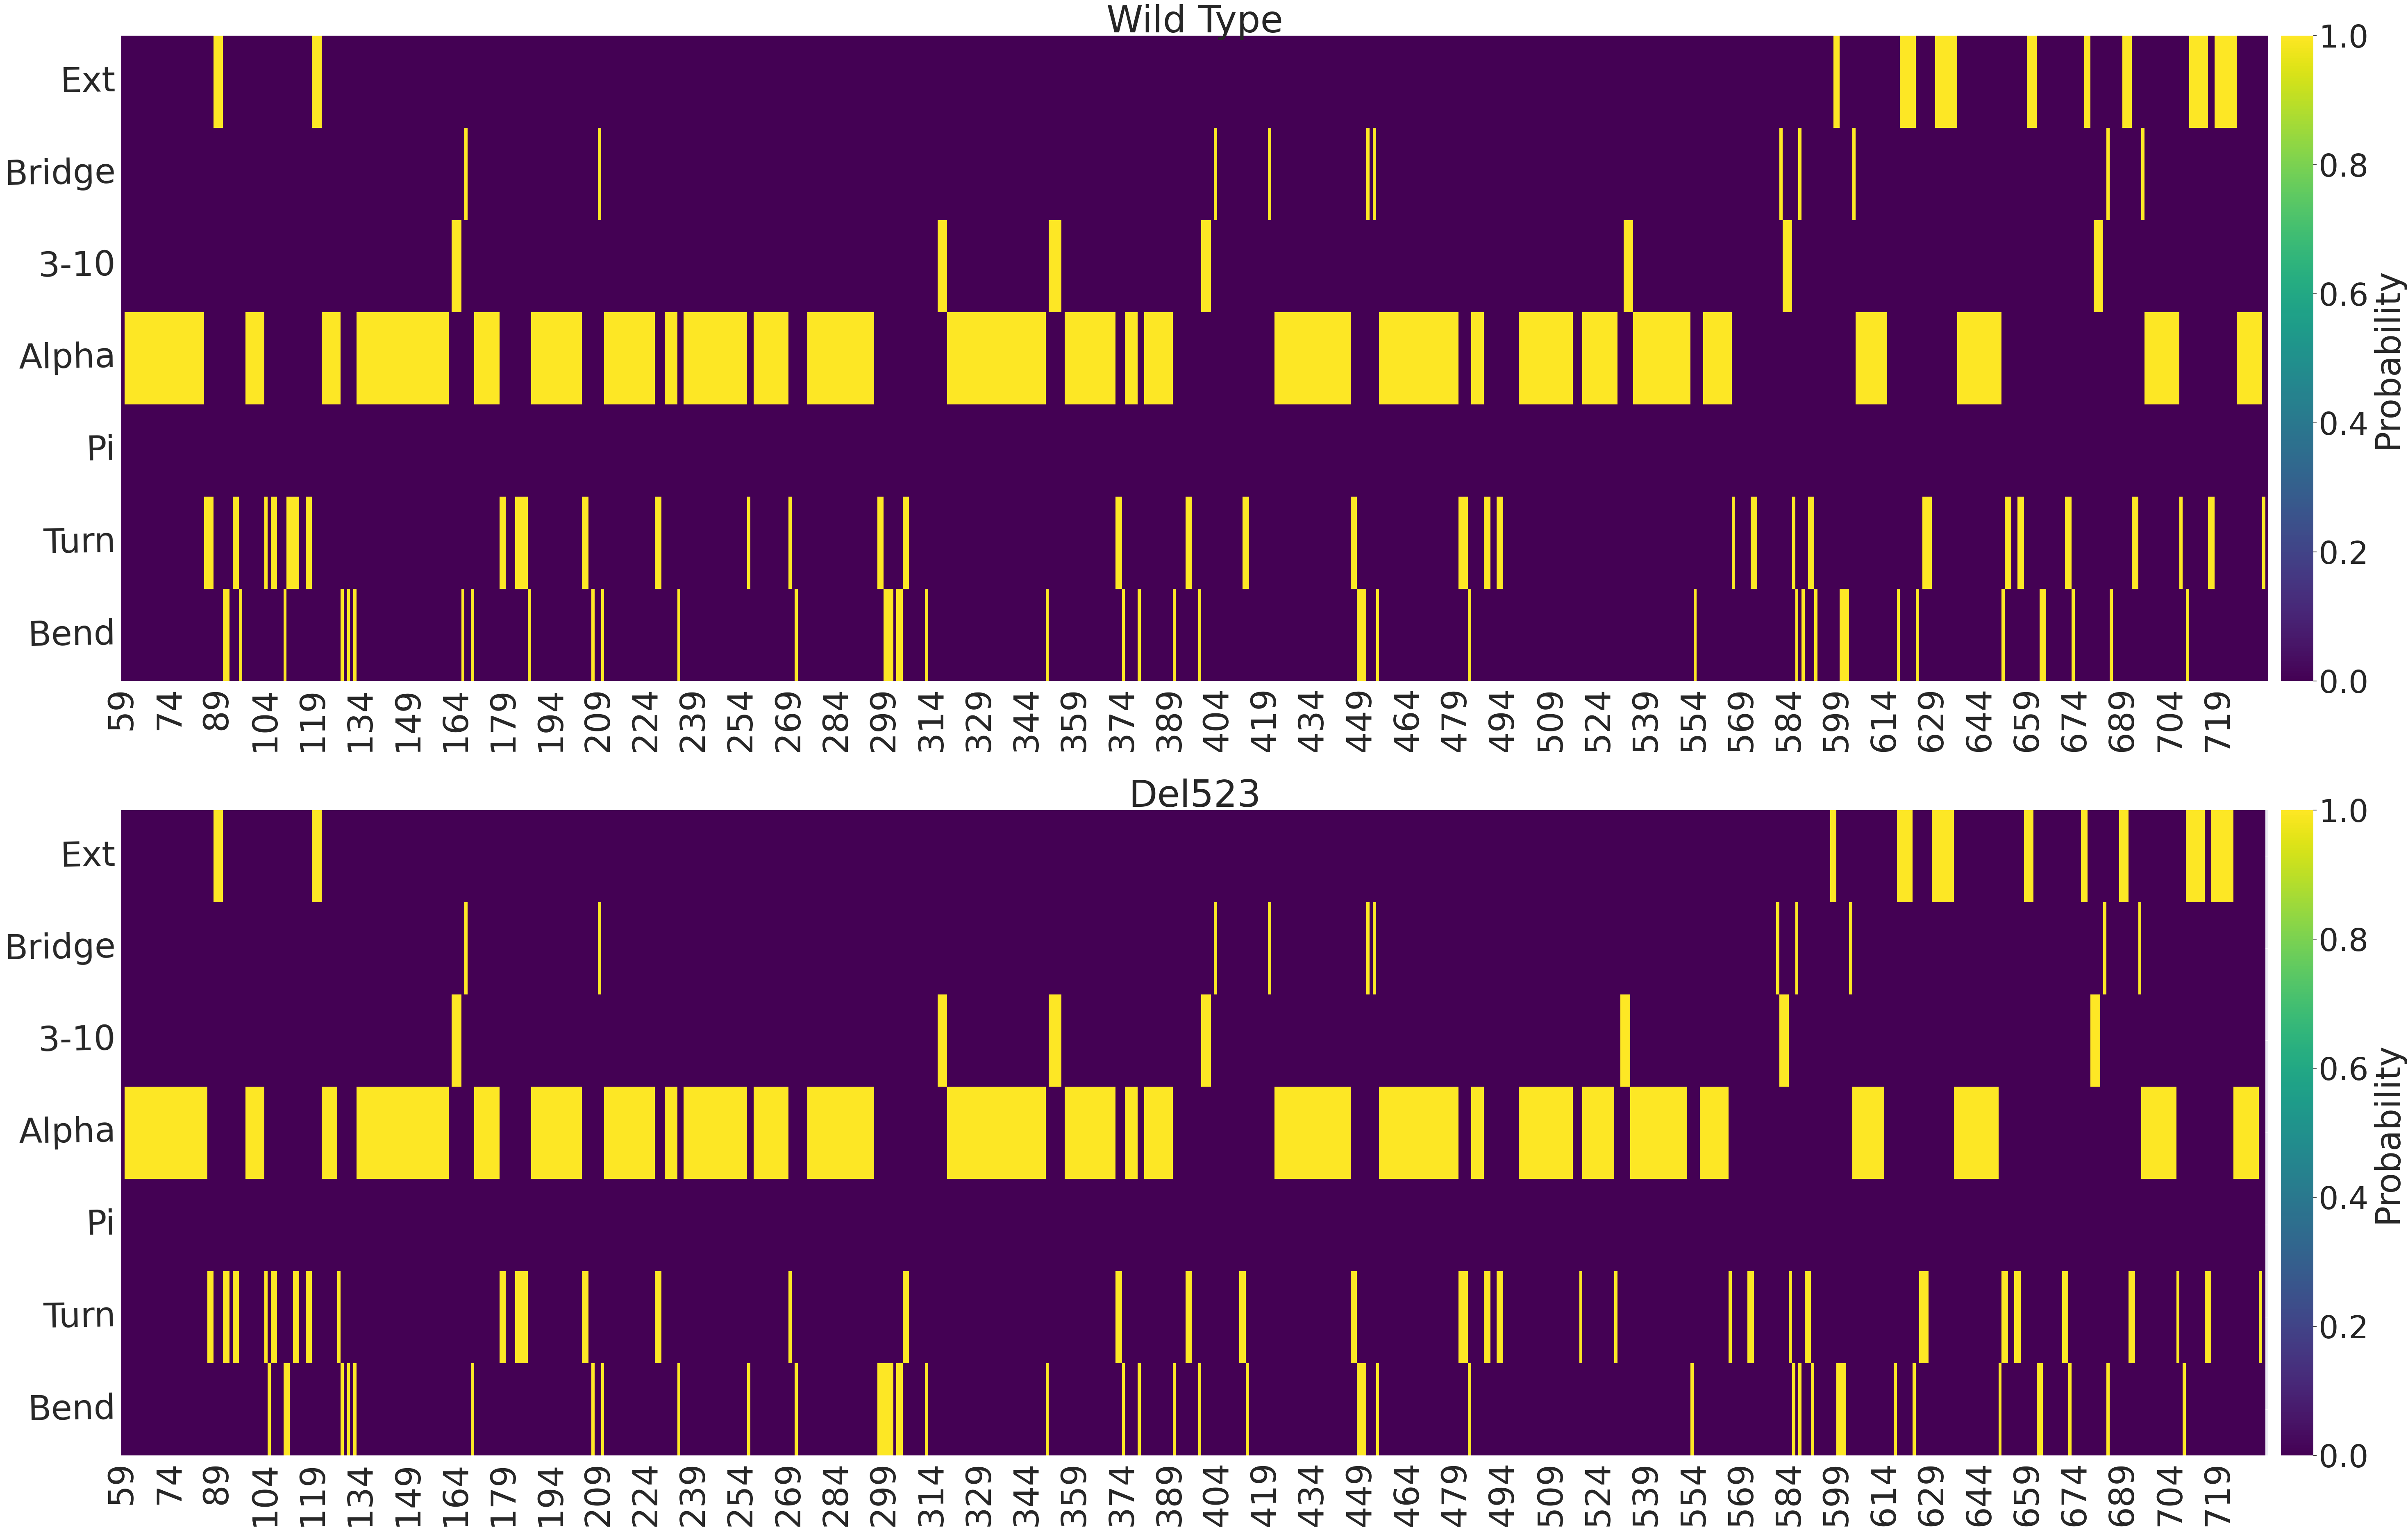

In [127]:
sel=['Ext','Bridge','3-10','Alpha','Pi','Turn','Bend']
names=['Wild Type','Del523']
AF=[wt_AF,mut_AF]
cbar_kws={'label':'Probability','pad':0.005}
f, axes=plt.subplots(2,1,figsize=(80,45))
for ind,ax in enumerate(axes.flat):
    tmp=AF[ind]
    sb.set(font_scale=5)
    sb.heatmap(np.transpose(tmp[sel]),vmin=0.0,vmax=1.0,cmap='viridis', ax=ax,cbar_kws=cbar_kws,center=0.5)
    ax.set_xticks(ticks=np.arange(0,675,15),labels=np.arange(59,675+58,15))
    ax.set_title(str(names[ind]),fontsize=65)
    #ax.set_aspect('equal')
    ax.tick_params(labelsize=60,labelrotation=True,axis='y')
    ax.tick_params(labelsize=60,axis='x')
    ax.set_xlim(0,676)
f.savefig('heatplot_AF.png')    

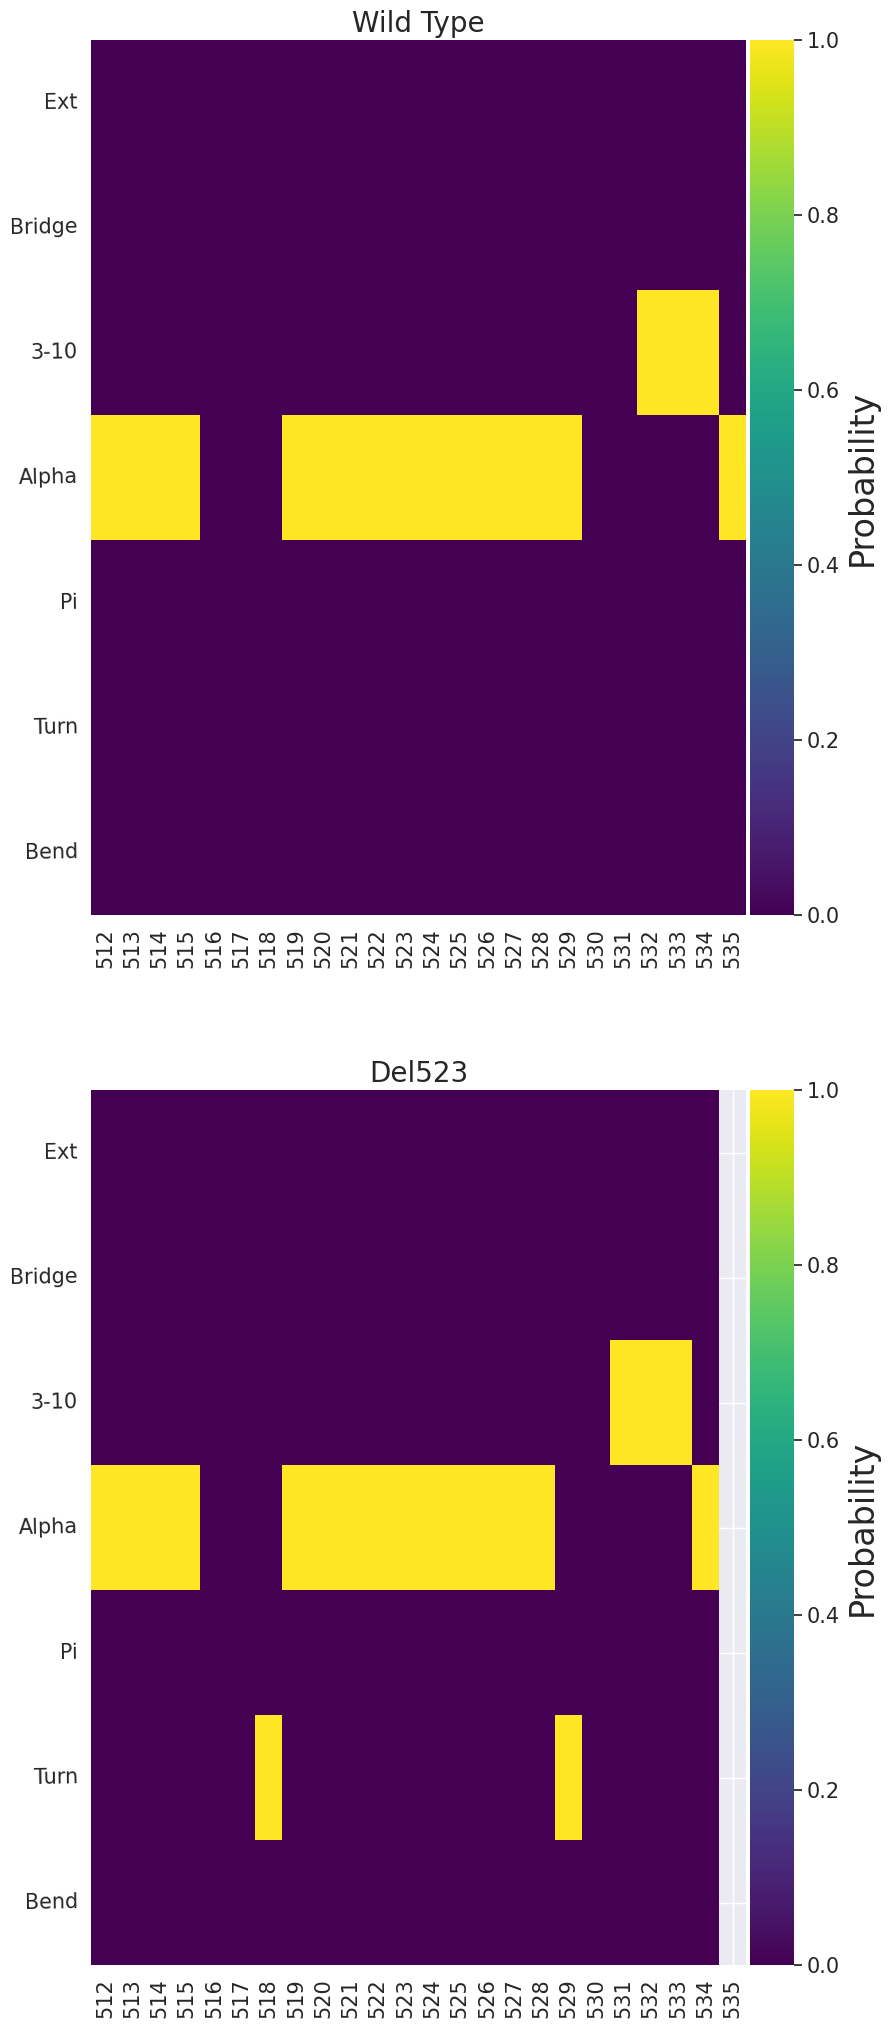

In [178]:
#ZOOM
sel=['Ext','Bridge','3-10','Alpha','Pi','Turn','Bend']
names=['Wild Type','Del523']
AF=[wt_AF,mut_AF]
cbar_kws={'label':'Probability','pad':0.005}
f, axes=plt.subplots(2,1,figsize=(10,25))
for ind,ax in enumerate(axes.flat):
    if (ind==0):
        tmpA=AF[ind][453:477]
    else:
        tmpA=AF[ind][453:476]
    sb.set(font_scale=2.0)
    #sb.heatmap(np.transpose(tmpA[sel]),vmin=0.0,vmax=1.0,cmap='viridis', ax=ax,cbar_kws=cbar_kws,center=0.5,xticklabels=tmpA['Resid'])
    sb.heatmap(np.transpose(tmpA[sel]),vmin=0.0,vmax=1.0,cmap='viridis', ax=ax,cbar_kws=cbar_kws)

    ax.set_xticks(ticks=np.arange(0.5,24.5,1),labels=np.arange(453+59,477+59,1))
    #+59 perché index starts from 0
    ax.set_title(str(names[ind]),fontsize=20)
    #ax.set_aspect('equal')
    ax.tick_params(labelsize=15,labelrotation=True,axis='y')
    ax.tick_params(labelsize=15,axis='x')
    ax.set_xlim(0,24)
    cbar=ax.collections[0].colorbar
    cbar.ax.tick_params(labelsize=15)